In [ ]:
import sklearn.datasets as skdatasets

(cancer_data,cancer_target) = skdatasets.load_breast_cancer(return_X_y=True, as_frame=True)

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np

SEED =12345

# Prepare data
x_train, x_test, y_train, y_test = train_test_split(cancer_data,cancer_target,test_size=0.3,random_state=SEED)
nClass= len(np.unique(y_test))

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
scaler.transform(x_train)
scaler.transform(x_test)

array([[-0.29099056, -0.9077973 , -0.2888116 , ..., -0.2647081 ,
         1.69740388,  0.14770736],
       [-0.48574735, -1.48435738, -0.55282815, ..., -1.31076088,
        -1.01750846, -0.79391157],
       [-0.17526551, -1.2385728 , -0.1551736 , ..., -0.35858844,
         0.34081288, -0.11981802],
       ...,
       [-1.21509741,  0.02480585, -1.15908837, ..., -0.26069739,
        -0.42573025,  0.06381234],
       [ 1.14004846, -0.09693791,  1.07160698, ...,  0.92929534,
        -0.09696457, -0.10749777],
       [-0.3474418 , -0.75159776, -0.37722455, ..., -0.14022753,
         0.88587177,  0.70563858]])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1984      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 4,130
Trainable params: 4,130
Non-trainable params: 0
_________________________________________________________________


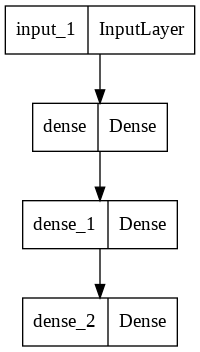

In [ ]:
# Prepare model
model = tf.keras.Sequential()

model.add(tf.keras.Input(shape=cancer_data.shape[1]))
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dense(32,activation='relu'))
model.add(tf.keras.layers.Dense(nClass,activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()
tf.keras.utils.plot_model(model)

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=16, epochs=30)

Epoch 1/30
25/25 [==============================] - 5s 46ms/step - loss: 6.9374 - accuracy: 0.6156 - val_loss: 2.1866 - val_accuracy: 0.6959
Epoch 2/30
25/25 [==============================] - 0s 15ms/step - loss: 1.1566 - accuracy: 0.8442 - val_loss: 0.3915 - val_accuracy: 0.9006
Epoch 3/30
25/25 [==============================] - 0s 10ms/step - loss: 0.8722 - accuracy: 0.8844 - val_loss: 0.3475 - val_accuracy: 0.9064
Epoch 4/30
25/25 [==============================] - 0s 11ms/step - loss: 0.6834 - accuracy: 0.8769 - val_loss: 0.2617 - val_accuracy: 0.9123
Epoch 5/30
25/25 [==============================] - 0s 8ms/step - loss: 0.5351 - accuracy: 0.9070 - val_loss: 0.4226 - val_accuracy: 0.8830
Epoch 6/30
25/25 [==============================] - 0s 10ms/step - loss: 0.4583 - accuracy: 0.9196 - val_loss: 0.6897 - val_accuracy: 0.8772
Epoch 7/30
25/25 [==============================] - 0s 11ms/step - loss: 0.4012 - accuracy: 0.9095 - val_loss: 0.4489 - val_accuracy: 0.8947
Epoch 8/30
25/

In [ ]:
from sklearn.model_selection import KFold

train_acc_list = []
val_acc_list = []

features_np = np.array(cancer_data)
labels_np = np.array(cancer_target)

kfold = KFold(n_splits=5,shuffle=True)
for train, test in kfold.split(features_np,labels_np):
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
  history = model.fit(features_np[train],labels_np[train],
                      validation_data=(features_np[test],labels_np[test]),
                      batch_size=16,epochs=30)
  train_acc_list.append(history.history['accuracy'][-1])
  val_acc_list.append(history.history['val_accuracy'][-1])
  tf.keras.backend.clear_session()
  
print(f'Mean training accuracy = {np.mean(train_acc_list)}')
print(f'Mean validation accuracy = {np.mean(val_acc_list)}')

Epoch 1/30
29/29 [==============================] - 1s 12ms/step - loss: 2.6565 - accuracy: 0.7714 - val_loss: 0.2496 - val_accuracy: 0.9298
Epoch 2/30
29/29 [==============================] - 0s 5ms/step - loss: 0.7668 - accuracy: 0.8747 - val_loss: 0.2585 - val_accuracy: 0.9561
Epoch 3/30
29/29 [==============================] - 0s 5ms/step - loss: 0.8341 - accuracy: 0.8813 - val_loss: 0.3061 - val_accuracy: 0.9561
Epoch 4/30
29/29 [==============================] - 0s 4ms/step - loss: 0.5381 - accuracy: 0.9055 - val_loss: 0.2088 - val_accuracy: 0.9474
Epoch 5/30
29/29 [==============================] - 0s 5ms/step - loss: 0.4231 - accuracy: 0.9077 - val_loss: 0.7902 - val_accuracy: 0.7807
Epoch 6/30
29/29 [==============================] - 0s 5ms/step - loss: 0.9050 - accuracy: 0.8637 - val_loss: 0.3970 - val_accuracy: 0.9474
Epoch 7/30
29/29 [==============================] - 0s 5ms/step - loss: 0.5253 - accuracy: 0.9187 - val_loss: 0.2321 - val_accuracy: 0.9035
Epoch 8/30
29/29 [=